In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy
from matplotlib import pyplot
from rl_book_gym.envs.racetrack import Env, Action, Reward

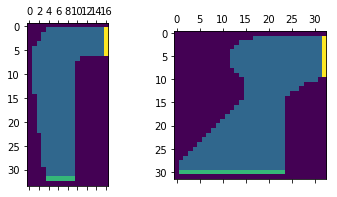

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
fig = pyplot.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-1.csv", delimiter=","))
ax = fig.add_subplot(1, 2, 2)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-2.csv", delimiter=","))

In [3]:
from IPython.display import display
env = Env("../asset/map-ex5-11-1.csv")

[pos-x, pos-y, vel-x, vel-y] =  [32  7 -1  0]
reward =  -1


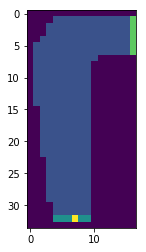

In [4]:
obs, reward, done, info = env.step([Action.down, Action.keep])
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)
print("reward = ", int(reward))

[pos-x, pos-y, vel-x, vel-y] =  [30  7 -2  0]
reward =  -1


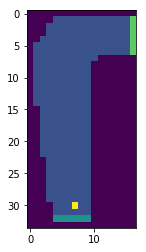

In [5]:
obs, reward, done, info = env.step([Action.down, Action.keep])
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)
print("reward = ", int(reward))

[pos-x, pos-y, vel-x, vel-y] =  [27  7 -3  0]
reward =  -1


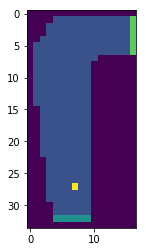

In [6]:
obs, reward, done, info = env.step([Action.down, Action.keep])
pyplot.imshow(env.render(mode="rgb_array"))
print("[pos-x, pos-y, vel-x, vel-y] = ", obs)
print("reward = ", int(reward))